In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Diwali Sales Data.csv", encoding = "unicode_escape")
df.shape

(11251, 15)

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.drop(['Status', 'unnamed1'], axis = 1, inplace = True)
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [6]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [7]:
df.dropna(inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [8]:
df['Amount'] = df['Amount'].astype('int')
df['Amount'].dtypes

dtype('int32')

In [9]:
df[['Age','Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610553
std,12.753866,1.114967,5222.355168
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


In [10]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Gender

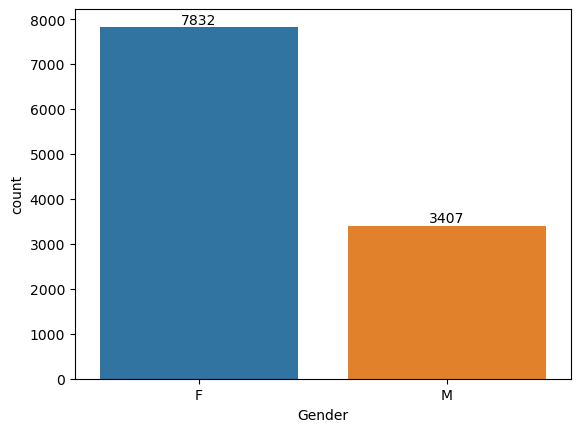

In [11]:
ax = sns.countplot(data = df, x = 'Gender')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Gender', ylabel='Amount'>

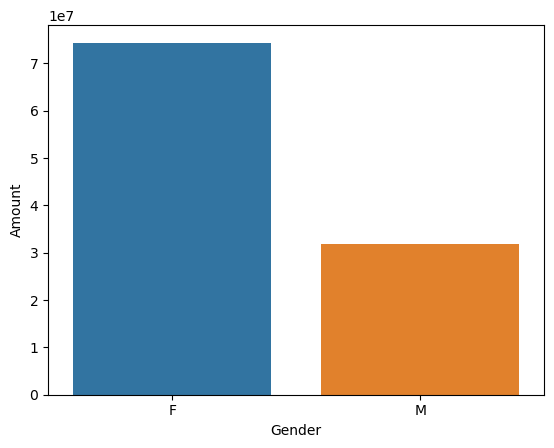

In [12]:
sales_gen = df.groupby(['Gender'], as_index = False )['Amount'].sum().sort_values(by = 'Amount', ascending = False)

sns.barplot(x = 'Gender', y = 'Amount', data = sales_gen)

*Females are spending more amount than Males* 

# Age Group

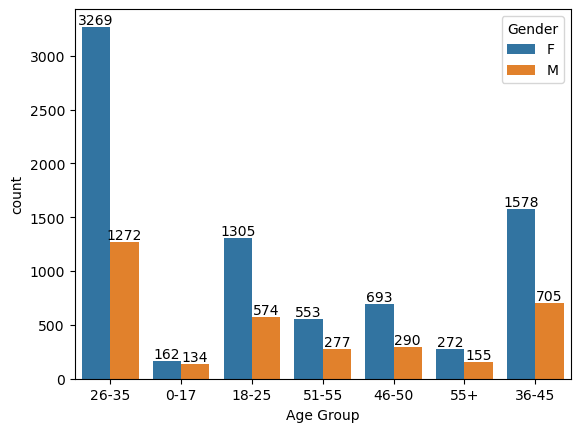

In [13]:
ax = sns.countplot(data = df, x = 'Age Group', hue = 'Gender')
for bar in ax.containers:
    ax.bar_label(bar)

<Axes: xlabel='Age Group', ylabel='Amount'>

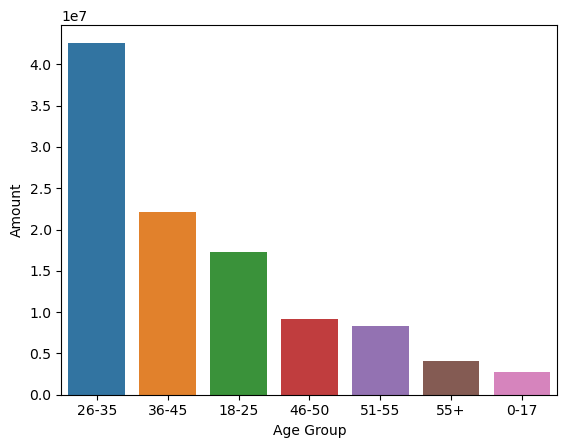

In [14]:
sales_age = df.groupby(['Age Group'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
sns.barplot(x= 'Age Group', y = 'Amount', data = sales_age)

*From the above graph we can see that Females of Age Group between (26-35) are spending more.*

# State

<Axes: xlabel='State', ylabel='Orders'>

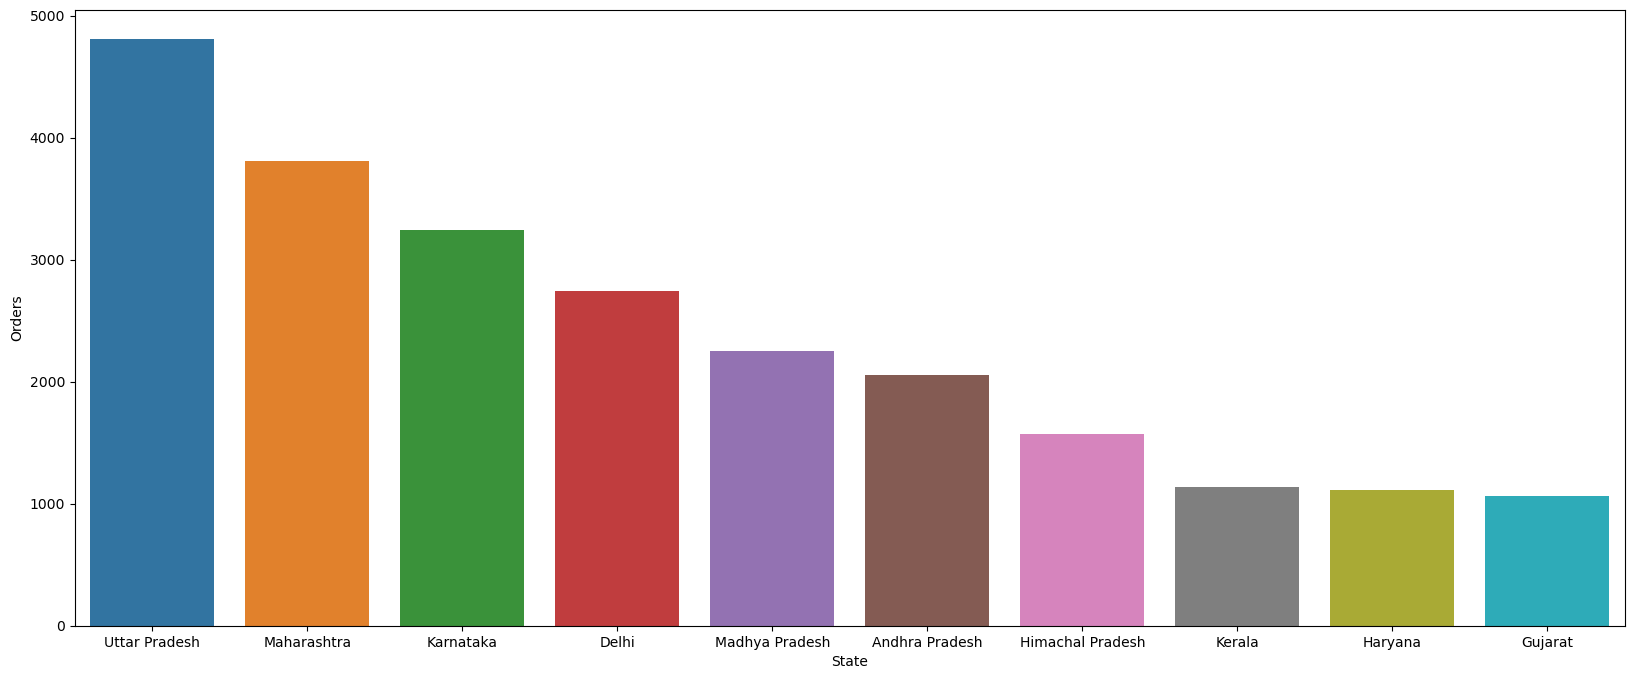

In [15]:
plt.figure(figsize = (20,8))

State_order = df.groupby(['State'], as_index = False )['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)

sns.barplot(x = 'State', y = 'Orders', data = State_order)

<Axes: xlabel='State', ylabel='Amount'>

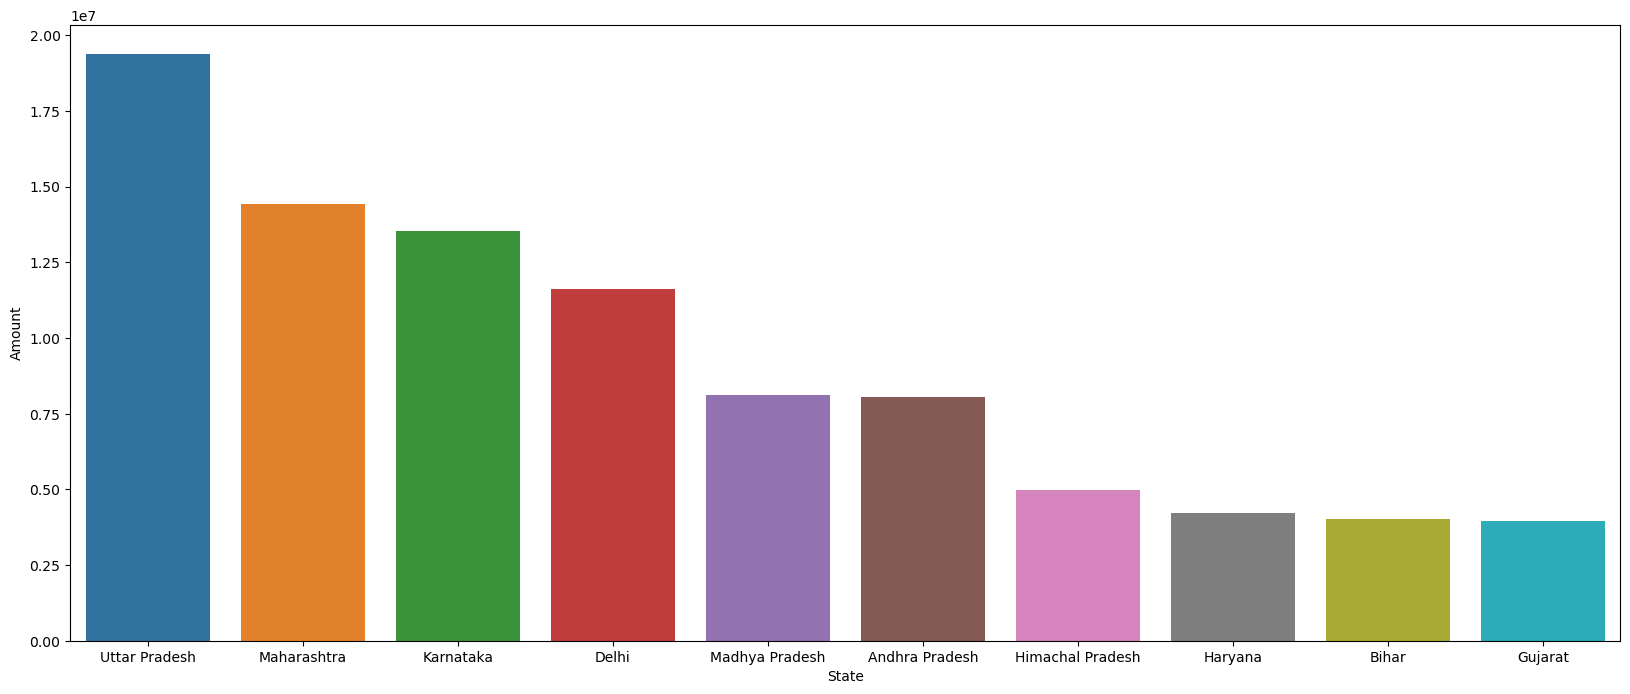

In [16]:
sales_state = df.groupby(['State'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)

plt.figure(figsize = (20,8))
sns.barplot(x = 'State', y = 'Amount', data = sales_state)

*Uttar Pradesh, Maharashtra and Karnataka states are placing more 'orders' and spending more 'amount'.* 

# Marital Status

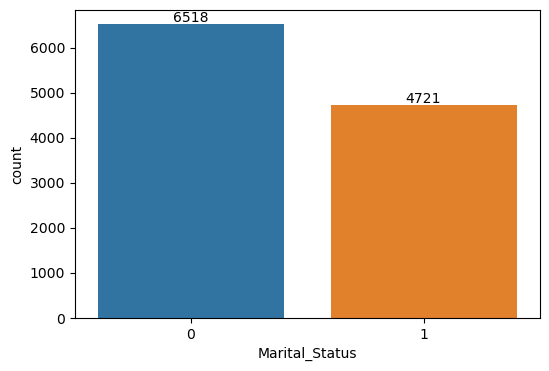

In [18]:

plt.figure(figsize = (6,4))
ax = sns.countplot(data = df, x = 'Marital_Status')


for bar in ax.containers:
    ax.bar_label(bar)    

<Axes: xlabel='Marital_Status', ylabel='Amount'>

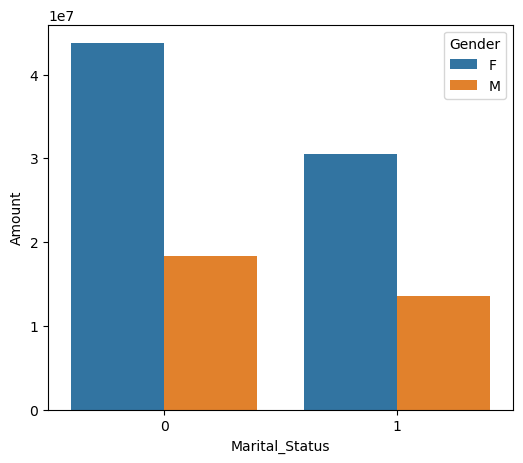

In [19]:
sales_by_gen_marital = df.groupby(['Marital_Status', 'Gender'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)

plt.figure(figsize = (6,5))

sns.barplot(data = sales_by_gen_marital, x = 'Marital_Status', y = 'Amount', hue = 'Gender')

*From the above graphs we can see that unmarried women are spending more on products.*

# Occupation

<Axes: xlabel='Occupation', ylabel='count'>

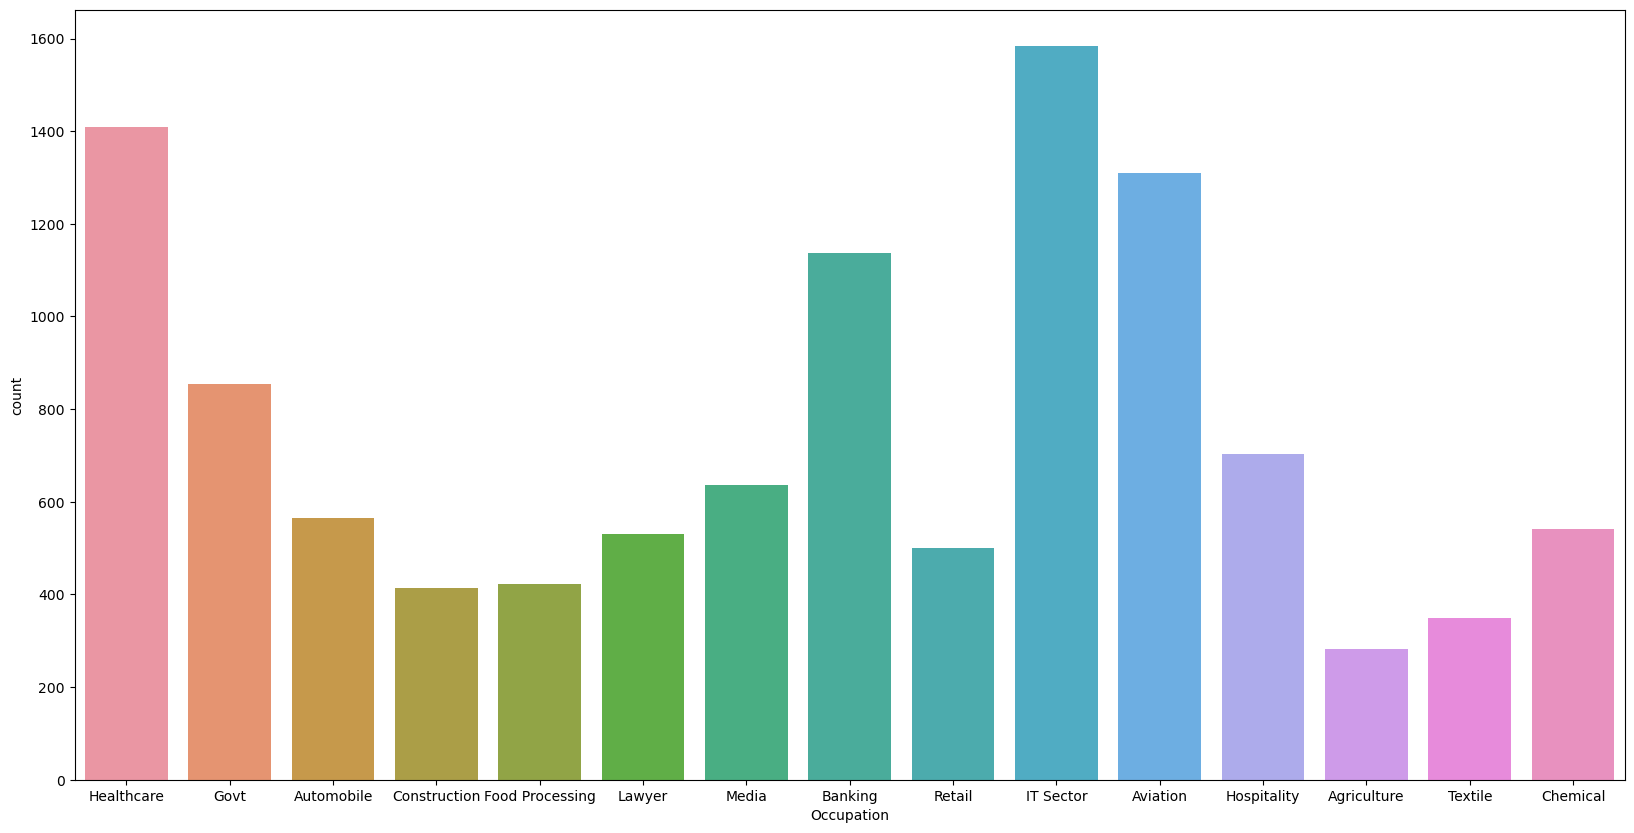

In [20]:
plt.figure(figsize = (20,10))
sns.countplot(data = df, x = 'Occupation')

<Axes: xlabel='Occupation', ylabel='Amount'>

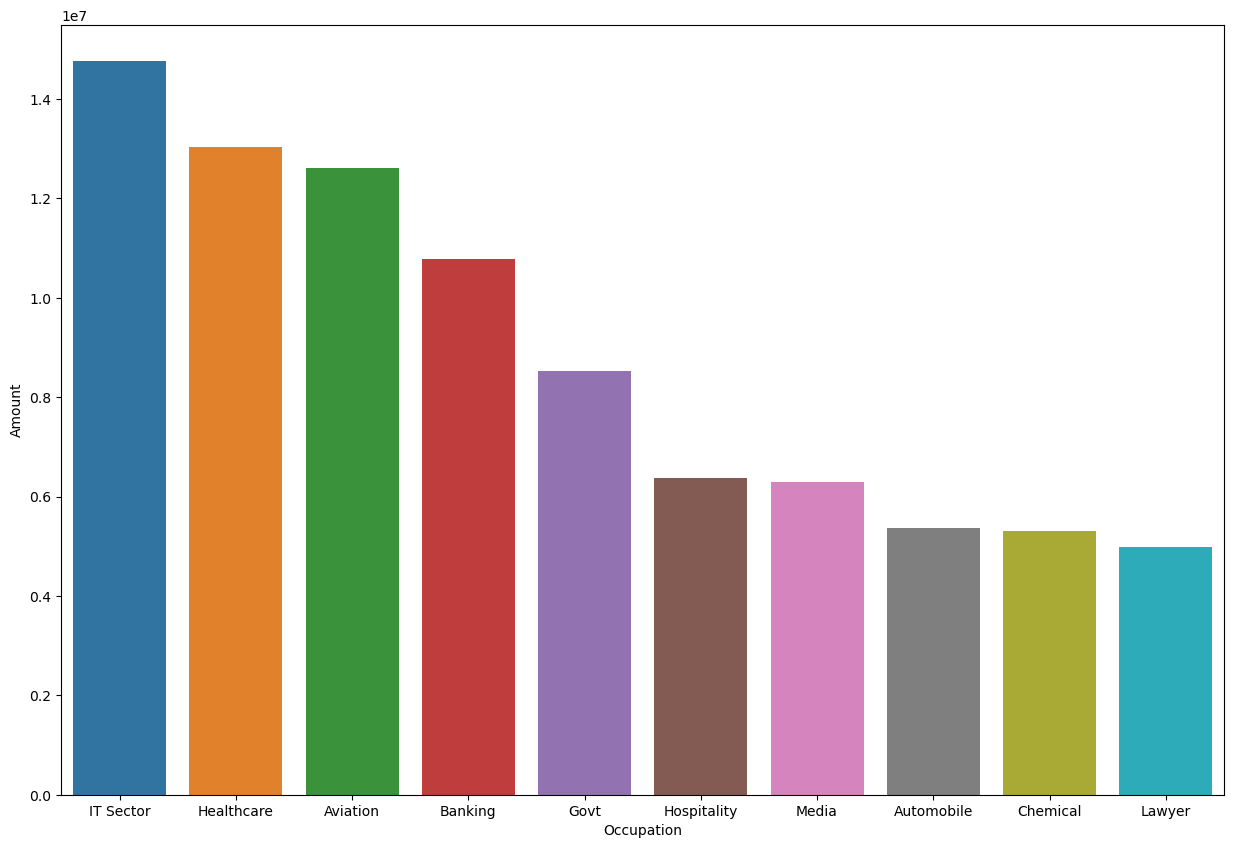

In [21]:
sales_occupation= df.groupby(['Occupation'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False).head(10)
plt.figure(figsize = (15,10))
sns.barplot(data = sales_occupation, x = 'Occupation', y ='Amount')

*From the above charts we can see that most of the buyers working in IT sector, Healthcare, Aviation.*

# Product Category

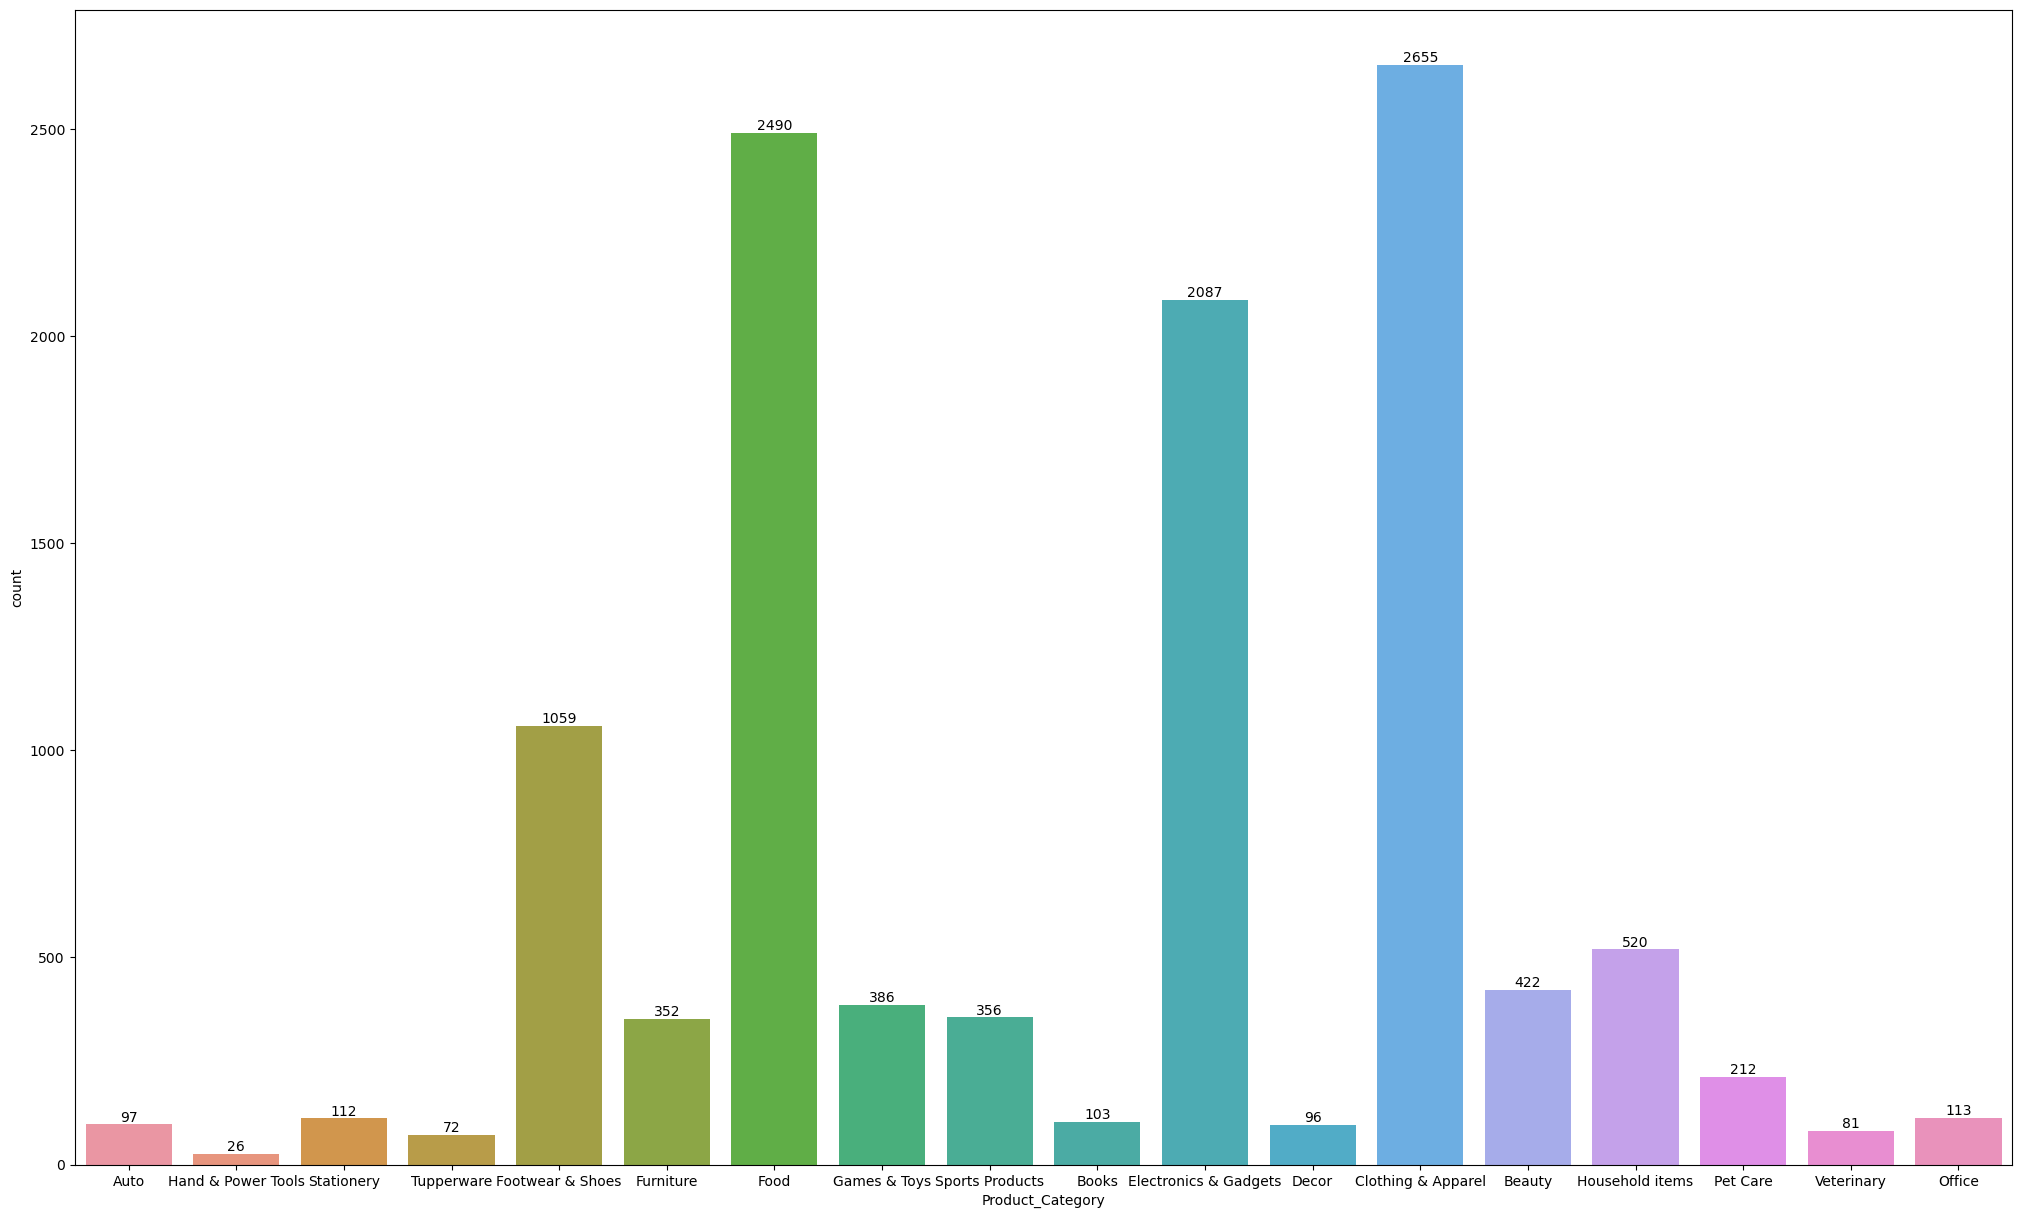

In [22]:
plt.figure(figsize = (25,15))
ax =sns.countplot(data = df, x = 'Product_Category')

for bars in ax.containers:
    ax.bar_label(bars)

<Axes: xlabel='Product_Category', ylabel='Amount'>

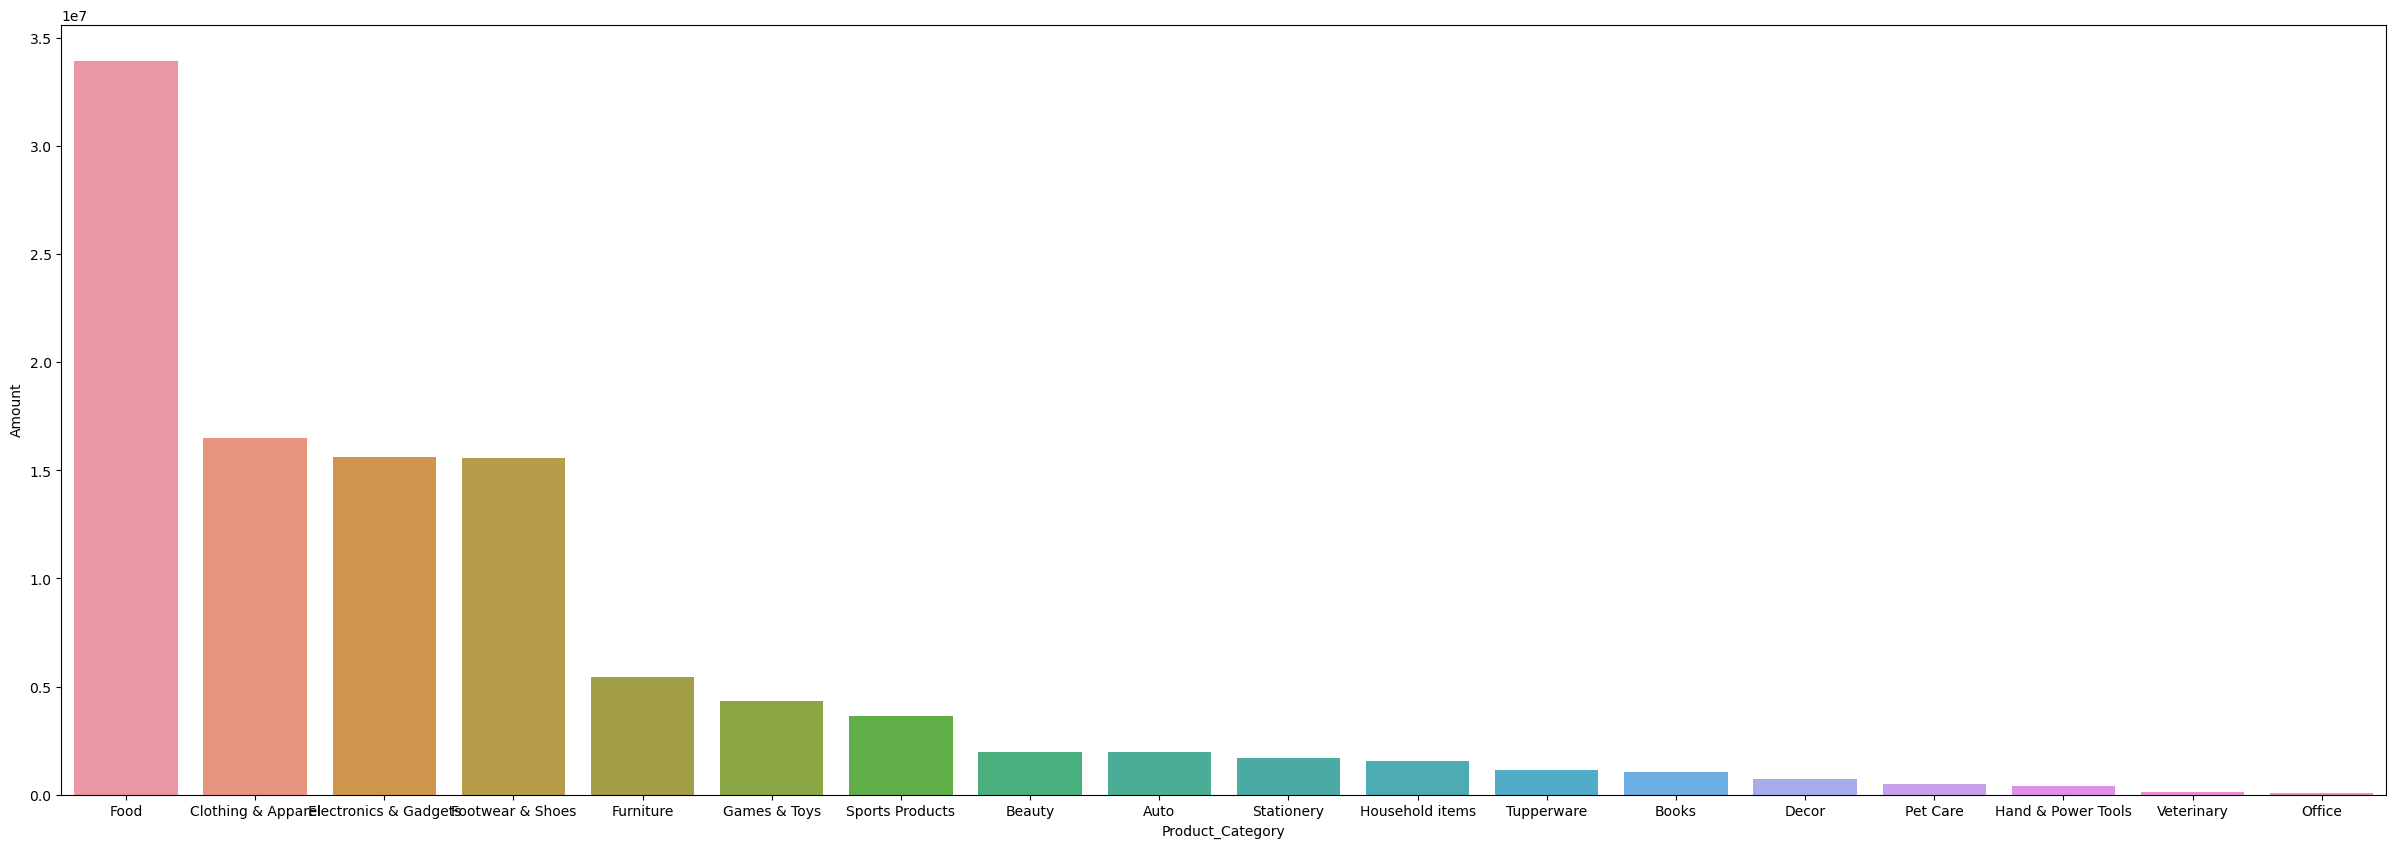

In [23]:
sales_product = df.groupby(['Product_Category'], as_index = False)['Amount'].sum().sort_values(by = 'Amount', ascending = False)
plt.figure(figsize = (30,10))
sns.barplot(data = sales_product, x= 'Product_Category', y = 'Amount')

*From the above graph we can observe that most amount is spend on Food, clothing, and Electronics products.*

<Axes: xlabel='Product_ID', ylabel='Orders'>

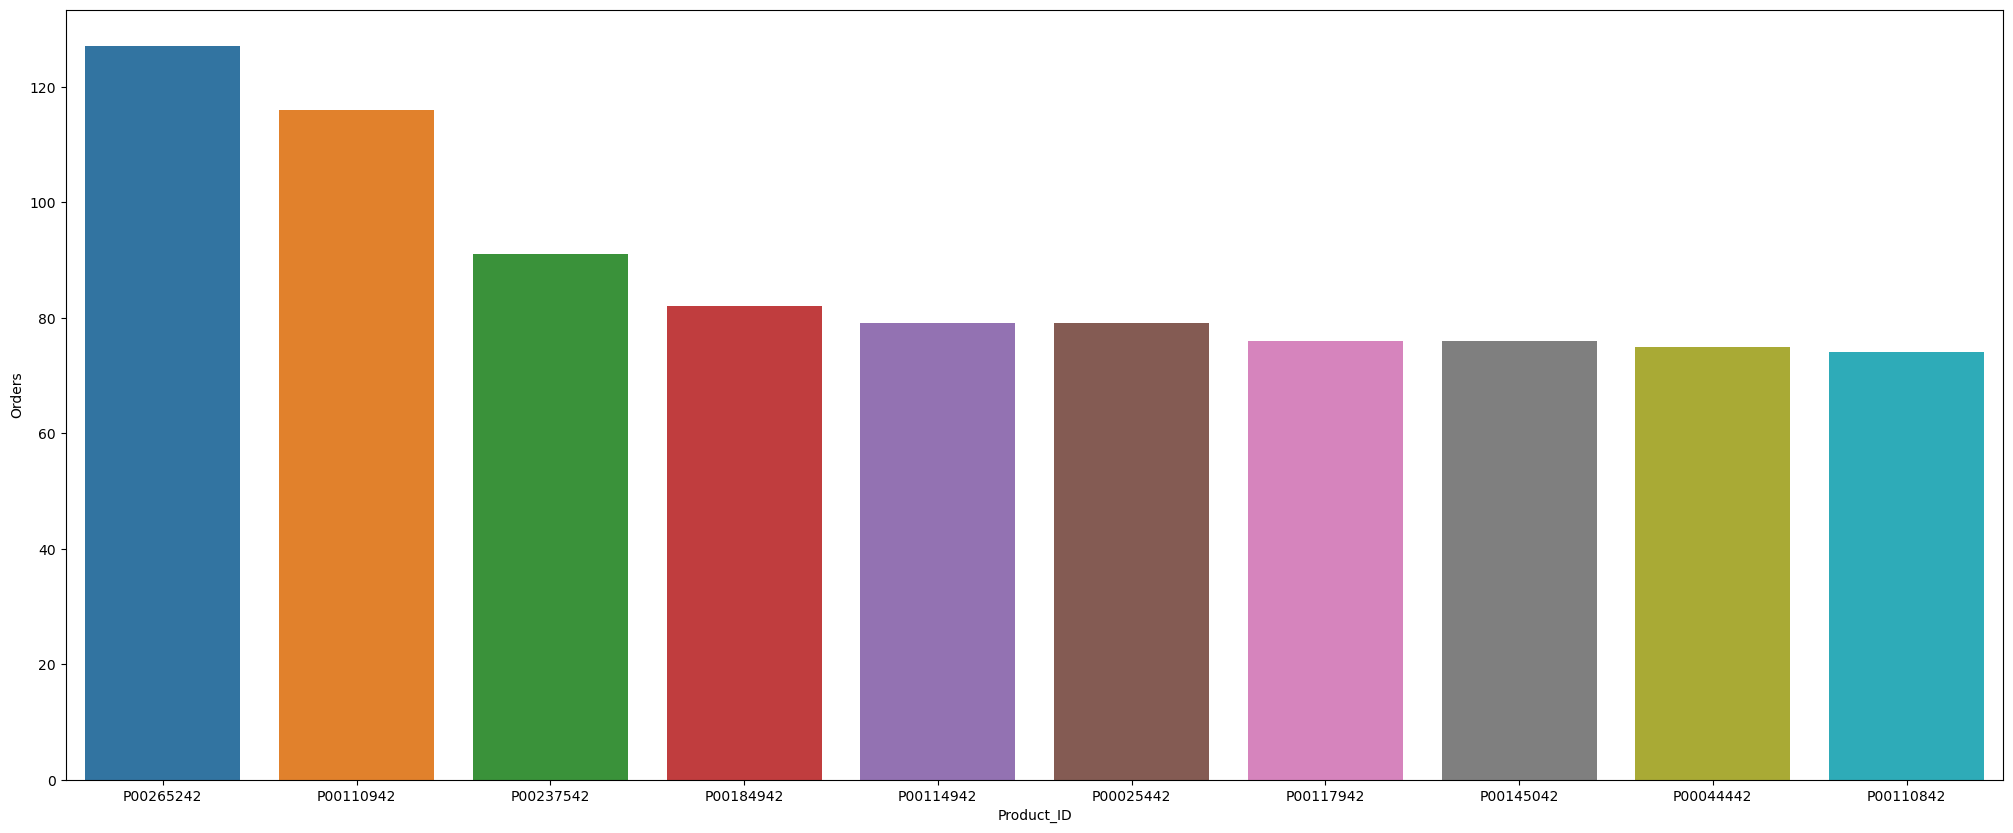

In [24]:
sales_pid= df.groupby(['Product_ID'], as_index= False)['Orders'].sum().sort_values(by = 'Orders', ascending = False).head(10)
plt.figure(figsize = (25,10))
sns.barplot(data = sales_pid, x = 'Product_ID', y ='Orders')

# Conclusion:


*Unmarried Women of Age group Between 25-36 yrs from UP, Maharashtra and Karnataka working in IT, Healthcare and Aviation are buying more products of Food, Clothing and Electronics Items.*